# Backup for project 

reference 1: 
According to wine writer and competition organizer Dan Berger, one of the most important criteria in evaluating wine competitions is the quality of the judges. Before agreeing to enter, he advises, be sure to check the competition's website for a list of participating judges. "They should be skilled tasters--professionals, not wine collectors," he says.

"Both the high-priced panel and the low-priced panel are prejudiced against their own wines. If you know you're judging the low-priced wines, you say to yourself, 'Well, there can't be anything worth a gold in here.' If you're judging the \\$30-and-above wines, that panel's going say, 'I wouldn't pay \\$30 for any of this crap.' So the end result is that you get a smaller percentage of gold medals for both high- and low-priced wines."(ref:https://winesvinesanalytics.com/columns/section/23/article/50637/Wine-Competitions-That-Help-You-Sell, access: May 27 2020)

reference 2: 
The first experiment took place in 2005. The last was in Sacramento earlier this month. Hodgson's findings have stunned the wine industry. Over the years he has shown again and again that even trained, professional palates are terrible at judging wine.

"Only about 10% of judges are consistent and those judges who were consistent one year were ordinary the next year. says Hodgson "Chance has a great deal to do with the awards that wines win."

These judges are not amateurs either. They read like a who's who of the American wine industry from winemakers, sommeliers, critics and buyers to wine consultants and academics. In Hodgson's tests, judges rated wines on a scale running from 50 to 100. In practice, most wines scored in the 70s, 80s and low 90s.
(ref:https://www.theguardian.com/lifeandstyle/2013/jun/23/wine-tasting-junk-science-analysis, access: May 27 2020)

reference 3: 
how a wine competition works (ref: https://www.newyorkwines.org/awards-how-a-competition-works, access: May 27 2020)

reference 4: 
top 9 wine management software. only one references increasing sales. so potentially untapped market and no guarentee that they are even using statistics on known reviewers. (ref: https://www.predictiveanalyticstoday.com/top-winery-management-software/)

# Quick Look at the wine_reviews_150k.csv 

importing, and graphing some basic aspects of the wine reviews to see if: 
- there is enough data per wine taster (at least 50 reviews of a variety of wine) 
- graph a few metrics vs. wine taster 
    - number of white/reds reviewed  
    - average score w/ highest and lowest marked
    - tags for the taste of the wine (clusters/counting?)

In [14]:
# graph imformation
%matplotlib notebook
import matplotlib.pyplot as plt #matlab plots
import seaborn as sns 
sns.set_style('whitegrid') # style preference on graphs

#useful packages for math, statistics and dictionaries 
from scipy import stats 
import numpy as np  
import collections #ordered dictionary

#importing,cleaning and managing datasets 
import pandas as pd 
from pandas import Series,DataFrame

#machine learning packages
from sklearn import ensemble, tree, model_selection 
# ensemble = random forest
# tree = decision tree 

# for generating random seeds in the game 
from random import seed, random
# seed random number generator
seed(1)

from ansimarkup import parse, ansiprint # colour print statements
import time # adds delays for gamer to read script

In [3]:
# load data set 
wine_150 = pd.read_csv("data/wine_reviews_150k.csv")
wine_130 = pd.read_csv("data/wine_reviews_130k.csv")

In [4]:
wine_150 = wine_150.loc[:, ~wine_150.columns.str.contains('^Unnamed')]
wine_130 = wine_130.loc[:, ~wine_130.columns.str.contains('^Unnamed')]
print(wine_150.head(),wine_150.info(), sep='\n') 
print(wine_130.head(), wine_130.info(), sep='\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB
  country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak,

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[10776, 25514, 9532, 415, 15134, 4415, 9537, 6332, 26244, 4966, 4177, 5147, 3685, 1835, 514, 491, 1085, 139, 27, 6]


<IPython.core.display.Javascript object>


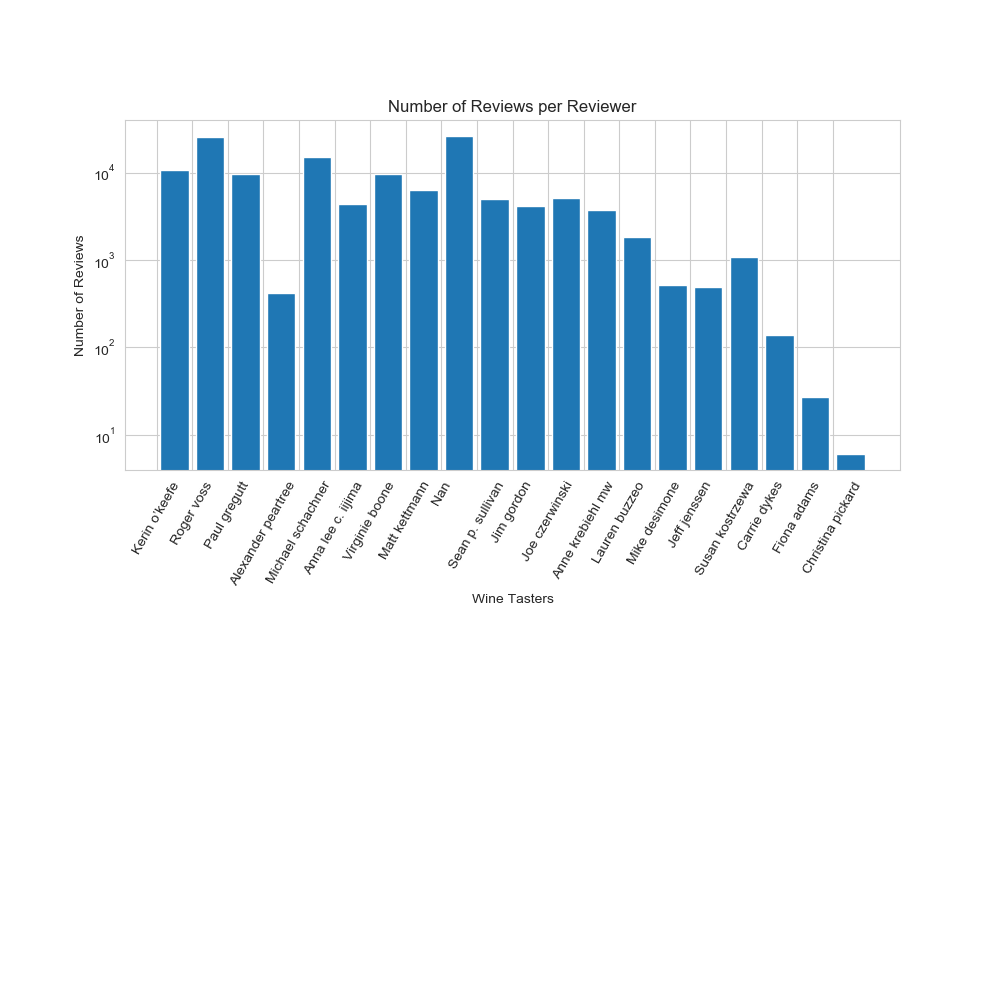

In [76]:
taster_dic = {}

for x in range(len(wine_130)): 
    name = str(wine_130.loc[x, 'taster_name']).capitalize().strip()
   # print(gender, type(gender))
    
    if name not in taster_dic: 
        taster_dic[name] = 0
    
    taster_dic[name] += 1

#print(taster_dic)

x = np.array(range(len(taster_dic)))
print(x)
y = list(taster_dic.values())
y_name = list(taster_dic.keys())
print(y)
width = 0.1
fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(211)
plt.bar(x, y) #taster_dic.values()
plt.yscale('log')
plt.title('Number of Reviews per Reviewer')
plt.xlabel('Wine Tasters')
plt.ylabel('Number of Reviews')
plt.xticks(x-0.5,y_name, rotation=60)

#ax= fig.add_subplot(212)
#sns.distplot(y, bins=18)

plt.show()

In [37]:

print(wine_130.iloc[6:20] )
#wine_130['taster_name'] = wine_130['taster_name'].astype(str)
#print(wine_130[wine_130["taster_name"].str.match('Anna lee')])
#print(wine_130[wine_130["taster_name"].str.match('Anne krebiehl')])

    Unnamed: 0    country                                        description  \
6            6      Italy  Here's a bright, informal red that opens with ...   
7            7     France  This dry and restrained wine offers spice in p...   
8            8    Germany  Savory dried thyme notes accent sunnier flavor...   
9            9     France  This has great depth of flavor with its fresh ...   
10          10         US  Soft, supple plum envelopes an oaky structure ...   
11          11     France  This is a dry wine, very spicy, with a tight, ...   
12          12         US  Slightly reduced, this wine offers a chalky, t...   
13          13      Italy  This is dominated by oak and oak-driven aromas...   
14          14         US  Building on 150 years and six generations of w...   
15          15    Germany  Zesty orange peels and apple notes abound in t...   
16          16  Argentina  Baked plum, molasses, balsamic vinegar and che...   
17          17  Argentina  Raw black-che

In [44]:
cols = [0,1,3,8]
#df = df[df.columns[cols]]
print(wine_130[wine_130.columns[cols]])

         country                                        description  points  \
0          Italy  Aromas include tropical fruit, broom, brimston...      87   
1       Portugal  This is ripe and fruity, a wine that is smooth...      87   
2             US  Tart and snappy, the flavors of lime flesh and...      87   
3             US  Pineapple rind, lemon pith and orange blossom ...      87   
4             US  Much like the regular bottling from 2012, this...      87   
...          ...                                                ...     ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...      90   
129967        US  Citation is given as much as a decade of bottl...      90   
129968    France  Well-drained gravel soil gives this wine its c...      90   
129969    France  A dry style of Pinot Gris, this is crisp with ...      90   
129970    France  Big, rich and off-dry, this is powered by inte...      90   

               taster_name  
0            Kerin O’K

In [10]:
print(wine_130.iloc[1120,1])


Chardonay and Pinot Noir are both present in this apple and pear flavored wine. A lively mousse brings out the fruit and acidity, giving a tangy, bright wine that's ready to drink now.


80
100


<IPython.core.display.Javascript object>


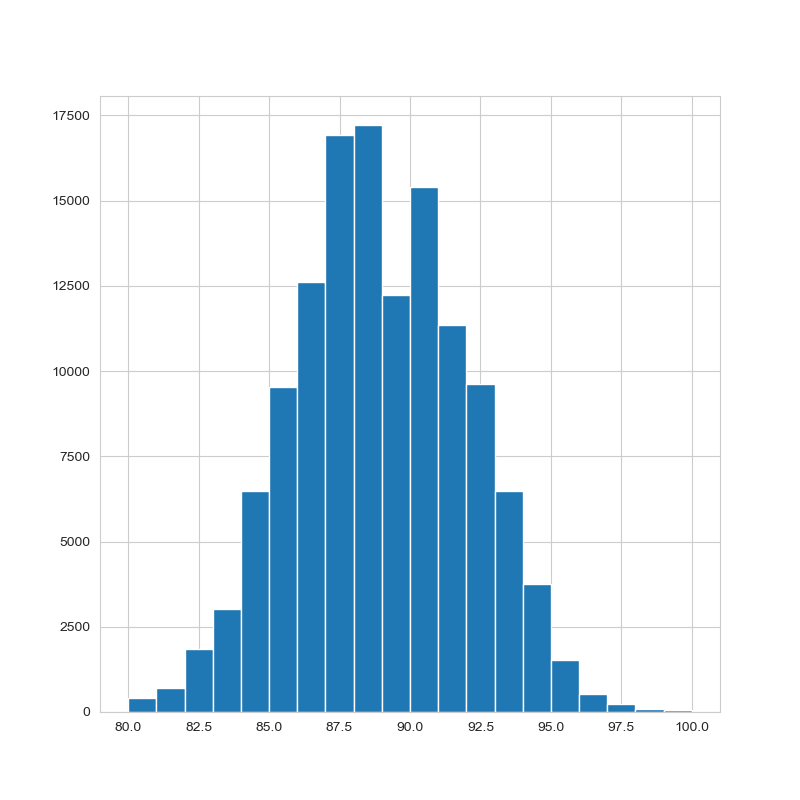

In [13]:
print(min(wine_130['points']))
print(max(wine_130['points']))
fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot(111)

plt.hist(wine_130['points'], bins=20)

plt.show()